<a href="https://colab.research.google.com/github/JuliaBatyrshina/DA_Netology/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1. Загрузите файл HR.csv в pandas dataframe

In [3]:
hr_data = pd.read_csv('/content/sample_data/HR.csv', sep=',') #грузим файл
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

# Задание 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
hr_data.describe()#смотрим основные стат характеристики

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [87]:
#!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(hr_data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В данных нет пропусков.
Есть дубли строк, но так как в датафрейме нет ид сотрудников, нельзя говорить, что это ошибки в данных.


# Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<Axes: >

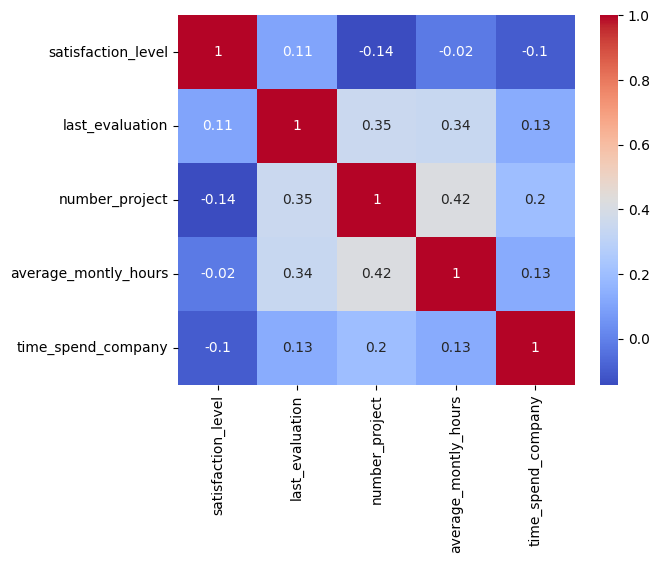

In [21]:
hr_data_new = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]#оставим только числовые параметры
sns.heatmap(hr_data_new.corr(), annot=True, cmap='coolwarm')

Две самые скоррелированные величины это:

1.кол-во проектов и среднее количество часов на рабочем месте в месяц

2.кол-во проектов и время с момента последней оценки в годах

Две наименее скоррелированные переменные:

1.уровень удовлетворенности и стаж работы

2.уровень удовлетворенности и среднее кол-во часов в месяц

# Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [22]:
hr_data.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

<ipython-input-23-c8fe60b46ffc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


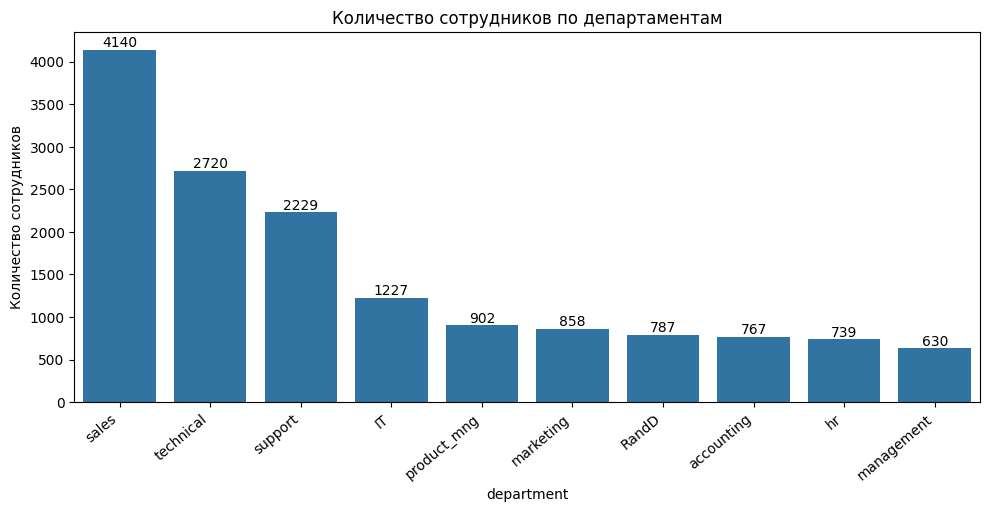

In [23]:
plt.figure(figsize=(10,5)) # this creates a figure 8 inch wide, 4 inch high

ax = sns.countplot(data=hr_data, x="department", order = hr_data.department.value_counts().index)
ax.bar_label(ax.containers[0])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.title("Количество сотрудников по департаментам")
plt.ylabel("Количество сотрудников")
plt.show()


#Задание 5. Показать распределение сотрудников по зарплатам.

In [24]:
hr_data.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

<ipython-input-25-1d9b18d9450c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


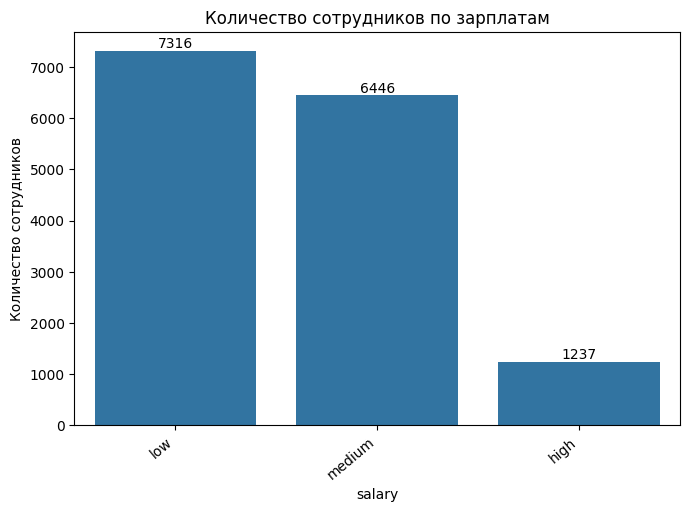

In [25]:
plt.figure(figsize=(7,5)) # this creates a figure 8 inch wide, 4 inch high

ax = sns.countplot(data=hr_data, x="salary", order = hr_data.salary.value_counts().index)
ax.bar_label(ax.containers[0])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.title("Количество сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.show()

# Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

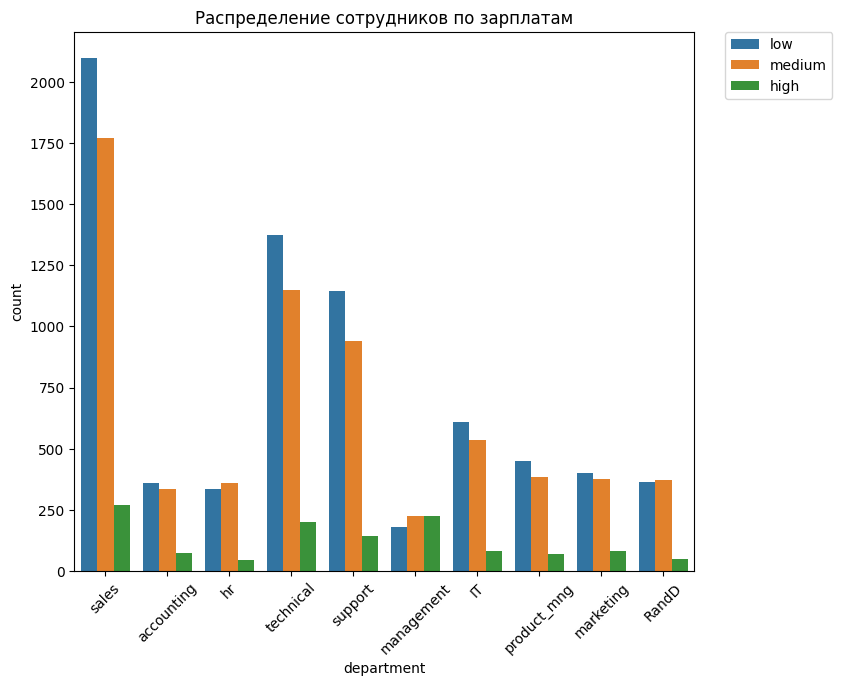

In [26]:
plt.figure(figsize=[8, 7])
sns.countplot(data=hr_data, x="department", hue="salary")
plt.title("Распределение сотрудников по зарплатам")
plt.xticks(rotation=45)
ax.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()


#Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Text(0.5, 1.0, 'Взаимосвязь между зп и времененм на работе')

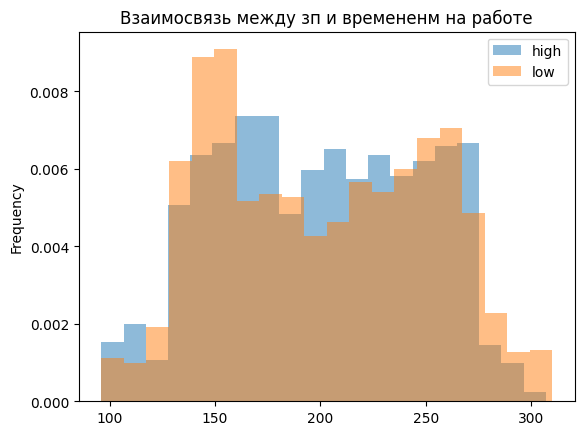

In [27]:
df_high = (hr_data.loc[hr_data['salary'] == 'high']['average_montly_hours'])
df_low = (hr_data.loc[hr_data['salary'] == 'low']['average_montly_hours'])

df_high.plot(kind='hist', alpha = 0.5, bins=20, label='high', density = True)
df_low.plot(kind='hist', alpha = 0.5, bins=20, label='low', density = True)

plt.legend(loc='upper right')
plt.title('Взаимосвязь между зп и времененм на работе')

Судя по графику данные рапсредлены не нормально. Проверим это

In [28]:
def check_normality(data): #функция для проверки нормального распределения
    stat,p = st.shapiro(data)

    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [29]:
check_normality(df_high)
check_normality(df_low)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Данные распределены не нормально, поэтому будем испольщовать непараметрический тест Манна-Уитни.

Нудевая гипотеза: разницы между уровнем зп и временем на работе нет.
Альтернативная: разница между уровнем зп и временем на работе есть.

In [30]:
stat, p = st.mannwhitneyu(df_high, df_low)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Т.о. тест показал, что статистически значимой разницы между уровнем зп и средним кол-вом часов на работе нет.

#Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

Т.к. promotion_last_5years заполняется 1 и 0, то среднее значение будет равно доле сотрудников с повышением последие 5 лет.

In [31]:
hr_data.groupby('left')[['satisfaction_level', 'number_project','promotion_last_5years']].mean()

,satisfaction_level,number_project,promotion_last_5years
left,,,
0,0.666810,3.786664,0.026251
1,0.440098,3.855503,0.005321


Средний уровень удовлетворенности выше у не уволенных сотрудников.

Среднее кол-во проектов у уволенных и не уволенных сотрудников примерно одинаково (4 штуки)

Среди уволенных сотрудников меньше людей с повышением за последние 5 лет (0,5%), при этом у не уволенных доля с повышением состалвяет 2,6%.

# 9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [36]:
hr_data.left.value_counts(normalize = True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

Есть дисбаланс по искомому признаку "left"

In [65]:
#подготовим выборки для обучения модели
X = hr_data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y = hr_data['left']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y)#делим группы

In [83]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

accuracy_score(y_test, lda.predict(X_test))

0.7728

Расчет точности вернул 77% угаданных ответов. Достигнутый уровень точности будем считать приемлемым, но в идеале ее нужно повышать.

In [86]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Коэффициенты']) #посмотрим на коэффициенты

,Коэффициенты
satisfaction_level,-0.668065
last_evaluation,0.095760
number_project,-0.031836
average_montly_hours,0.000652
time_spend_company,0.032380
Work_accident,-0.152345
promotion_last_5years,-0.161389
